In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/My Drive/MLGroupProject/Dataset/")

In [17]:
import numpy as np 
import pandas as pd 
import torch
from tqdm import tqdm
import pickle
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
delivery=pd.read_csv('./kaggle_data/deliveries.csv')
matches=pd.read_csv('./kaggle_data/matches.csv')  

# Create embedding for players

In [5]:
total_players = []
for file in os.listdir("/content/drive/My Drive/MLGroupProject/Dataset/ipl_stats/"):
    if file[-1:]!='v':
        continue

    df = pd.read_csv("/content/drive/My Drive/MLGroupProject/Dataset/ipl_stats/"+file)
    print(df.isna().sum())

    total_players.extend(df['name'].to_list())

total_players = list(set(total_players))

pos          0
name         0
team_no      0
team_name    0
pts          0
mat          0
wkts         0
dots         0
4s           0
6s           0
catches      0
stumpings    0
dtype: int64
pos          0
name         0
team_no      0
team_name    0
pts          0
mat          0
wkts         0
dots         0
4s           0
6s           0
catches      0
stumpings    0
dtype: int64
pos          0
name         0
team_no      0
team_name    0
pts          0
mat          0
wkts         0
dots         0
4s           0
6s           0
catches      0
stumpings    0
dtype: int64
pos          0
name         0
team_no      0
team_name    0
pts          0
mat          0
wkts         0
dots         0
4s           0
6s           0
catches      0
stumpings    0
dtype: int64
pos          0
name         0
team_no      0
team_name    0
pts          0
mat          0
wkts         0
dots         0
4s           0
6s           0
catches      0
stumpings    0
dtype: int64
pos          0
name         0
team_

In [6]:
len(total_players)

703

In [12]:
list_dict_players = []

for file in os.listdir("/content/drive/My Drive/MLGroupProject/Dataset/ipl_stats/"):
    if file[-1:]!='v':
        continue
    
    player_dict = {} ## store vocab 
    
    df = pd.read_csv("/content/drive/My Drive/MLGroupProject/Dataset/ipl_stats/"+file)

    ## Create vocab 
    for idx in tqdm(range(len(df))):
        if df['name'][idx][:-1] in player_dict.keys():
            player_dict[df['name'][idx][:-1]].append(torch.tensor([df['pts'][idx], df['mat'][idx], df['wkts'][idx], df['dots'][idx], df['4s'][idx], df['6s'][idx], df['catches'][idx], df['stumpings'][idx]]).unsqueeze(0))
        else:
            player_dict[df['name'][idx][:-1]] = [torch.tensor([df['pts'][idx], df['mat'][idx], df['wkts'][idx], df['dots'][idx], df['4s'][idx], df['6s'][idx], df['catches'][idx], df['stumpings'][idx]]).unsqueeze(0)]
    
    list_dict_players.append(player_dict)

100%|██████████| 151/151 [00:00<00:00, 7488.94it/s]


In [13]:
player_dict = {} ## store vocab 
for file in os.listdir("/content/drive/My Drive/MLGroupProject/Dataset/ipl_stats/"):
    if file[-1:]!='v':
        continue
    
    
    df = pd.read_csv("/content/drive/My Drive/MLGroupProject/Dataset/ipl_stats/"+file)

    player_list = df['name'].to_list()

    for player in tqdm(total_players):
        if player in player_list:
            player_row = df.loc[df['name'] == player]
            
            if " ".join(player.split()) in player_dict.keys():
                player_dict[" ".join(player.split())].append(np.array([player_row['pts'].values[0]/player_row['mat'].values[0], player_row['mat'].values[0], 
                                                                       player_row['wkts'].values[0]/player_row['mat'].values[0], player_row['dots'].values[0]/player_row['mat'].values[0], 
                                                                       player_row['4s'].values[0]/player_row['mat'].values[0], player_row['6s'].values[0]/player_row['mat'].values[0], 
                                                                    player_row['catches'].values[0]/player_row['mat'].values[0], player_row['stumpings'].values[0]/player_row['mat'].values[0]]))
            else:
                player_dict[" ".join(player.split())] = [np.array([player_row['pts'].values[0]/player_row['mat'].values[0], player_row['mat'].values[0], player_row['wkts'].values[0]/player_row['mat'].values[0], 
                                                          player_row['dots'].values[0]/player_row['mat'].values[0], player_row['4s'].values[0]/player_row['mat'].values[0], player_row['6s'].values[0]/player_row['mat'].values[0], 
                                                          player_row['catches'].values[0]/player_row['mat'].values[0], player_row['stumpings'].values[0]/player_row['mat'].values[0]])]
        else:
            if " ".join(player.split()) in player_dict.keys():
                player_dict[" ".join(player.split())].append([])
            else:
                player_dict[" ".join(player.split())] = [[]]

100%|██████████| 703/703 [00:00<00:00, 5320.57it/s]


In [14]:
player_dict['Shane Watson'][0].shape

(8,)

In [15]:
for year_dict in list_dict_players:
    year_stoi = {}
    for idx, (key, value) in enumerate(year_dict.items()):
        print(idx, key, value)
        break

0 Shane Watson [tensor([[406.5000,  15.0000,  17.0000, 158.0000,  47.0000,  19.0000,   2.0000,
          19.0000]], dtype=torch.float64)]
0 Adam Gilchrist     [tensor([[281.5000,  16.0000,   0.0000,   0.0000,  54.0000,  29.0000,  10.0000,
          29.0000]], dtype=torch.float64)]
0 Jacques Kallis [tensor([[380.,  16.,  13., 118.,  67.,   9.,   7.,   9.]], dtype=torch.float64)]
0 Chris Gayle [tensor([[409.5000,  12.0000,   8.0000,  80.0000,  57.0000,  44.0000,   2.0000,
          44.0000]], dtype=torch.float64)]
0 Chris Gayle [tensor([[331.5000,  15.0000,   0.0000,   5.0000,  46.0000,  59.0000,   2.0000,
          59.0000]], dtype=torch.float64)]
0 Shane Watson [tensor([[386.,  16.,  13., 101.,  59.,  22.,   6.,  22.]], dtype=torch.float64)]
0 Glenn Maxwell [tensor([[286.,  16.,   1.,  14.,  48.,  36.,   9.,  36.]], dtype=torch.float64)]
0 Andre Russell [tensor([[312.,  13.,  14.,  94.,  35.,  19.,   6.,  19.]], dtype=torch.float64)]
0 Virat Kohli [tensor([[356.5000,  16.0000,   0.0000

In [16]:
final_player_dict = {}
final_player_stoi = {}
embed_matrix = np.zeros((1,8))
for idx, (key, value) in tqdm(enumerate(player_dict.items())):
    # print(idx, key, value)
    final_player_stoi[key] = idx

    ## store scaling factor 
    nb_years = 0
    vec = np.zeros((8,))

    ## Values in different years
    for year in value:
        
        if type(year) == type(np.zeros((1,))):
            nb_years += 1

            ## Update the vector
            vec = vec + year

    final_player_dict[key] = (vec / nb_years).reshape((1,8))
    embed_matrix = np.concatenate((embed_matrix, final_player_dict[key]))
    # break
embed_matrix = np.delete(embed_matrix, (0), axis=0)

588it [00:00, 19519.04it/s]


In [19]:
## Save embeddings 
filehandler = open("Embeddings/emb_player_vec_dict", 'wb')
pickle.dump(final_player_dict, filehandler)
filehandler.close()

filehandler = open("Embeddings/emb_player_stoi_dict", 'wb')
pickle.dump(final_player_stoi, filehandler)
filehandler.close()

filehandler = open("Embeddings/emb_matrix", 'wb')
pickle.dump(embed_matrix, filehandler)
filehandler.close()

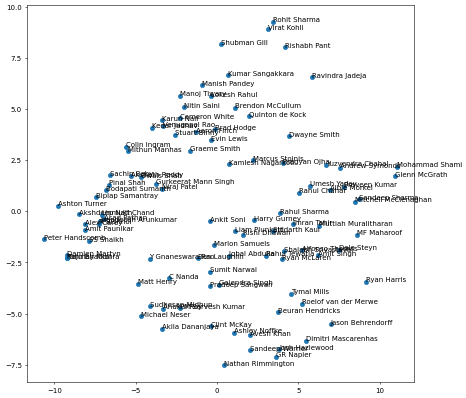

In [21]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embed_matrix[:100, :])

# create a scatter plot of the projection
plt.figure(figsize=(10, 10), dpi=50)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
players = list(final_player_dict.keys())
for i, player in enumerate(players[:100]):
	plt.annotate(player, xy=(pca_result[i, 0], pca_result[i, 1]))
plt.show()

In [22]:
pca = TSNE(n_components=2)
pca_result = pca.fit_transform(embed_matrix)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  


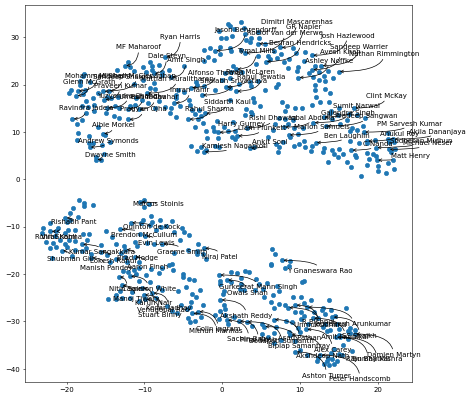

In [24]:
# create a scatter plot of the projection
plt.figure(figsize=(10, 10), dpi=50)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
players = list(final_player_dict.keys())
for i, player in enumerate(players[:100]):
	plt.annotate(player, xy=(pca_result[i, 0], pca_result[i, 1]), textcoords='offset points', arrowprops=dict(arrowstyle="->",connectionstyle="angle3"))
plt.show()

In [25]:
fig = go.Figure(data=go.Scatter(x=pca_result[:, 0],
                                y=pca_result[:, 1],
                                mode='markers',
                                text=list(final_player_dict.keys()))) # hover text goes here

fig.update_layout(title='Player Embeddings')
fig.show()